In [1]:
%matplotlib inline
import PIL as PIL
import numpy as np
import matplotlib.pyplot as plt
im = PIL.Image.open('input1.bmp')

im = np.asarray(im)
plt.imshow(im)
plt.show()

In [73]:
im_norm = im/255.0
def inv_gamma_fun(a):
    if a<=0.04044:
        return a/12.92
    else:
        return np.power((a+0.055)/(1+0.055),2.4)
def gamma_fun(a):
    if a<=0.00313:
        return a*12.92
    else:
        return (1+0.055)*np.power(a,1/2.4)-0.055
inv_gamma = np.vectorize(inv_gamma_fun)
im_ungamma = inv_gamma(im_norm)

In [74]:
P = np.array([[0.4124,0.3576,0.1805],
              [0.2126,0.7152,0.0722],
              [0.0193,0.1192,0.9505]])
P_inv = np.linalg.inv(P)
def T_transform(linear_rgb_image,T):
    im_xyz = np.zeros(linear_rgb_image.shape)
    print(im_xyz.shape)
    for i in range(linear_rgb_image.shape[0]):
        for j in range(linear_rgb_image.shape[1]):
            rgb = np.transpose(np.matrix(linear_rgb_image[i][j]))
            im_xyz[i][j] = np.transpose(np.dot(T,rgb))
    return im_xyz
im_xyz = T_transform(im_ungamma,P)

(800L, 1200L, 3L)


## “wrong von Kries” transformation


In [75]:
im_xyz[545][157]

array([ 0.61262392,  0.64087404,  0.37158204])

In [76]:
wrong_K_T = np.zeros((3,3))
p_white_xyz = np.array([0.3127,0.329,1-0.3127-0.329])
wrong_K_T[range(wrong_K_T.shape[0]),range(wrong_K_T.shape[1])] = np.divide(p_white_xyz,im_xyz[560][160])
im_balance_xyz = np.zeros(im_xyz.shape)

for i in range(im_xyz.shape[0]):
        for j in range(im_xyz.shape[1]):
            xyz = np.transpose(np.matrix(im_xyz[i][j]))
            im_balance_xyz[i][j] = np.transpose(np.dot(wrong_K_T,xyz))

(800L, 1200L, 3L)


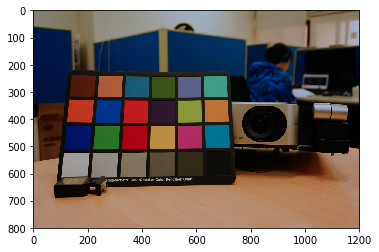

In [77]:
im_balance_lrgb = T_transform(im_balance_xyz,P_inv)

gamma = np.vectorize(gamma_fun)
im_gamma_srgb = gamma(im_balance_lrgb)
output = im_gamma_srgb*255
output[output>255] = 255
output[output<0] = 0
plt.imshow(output.astype(np.uint8))
plt.show()

## Von Kries's method

In [78]:
T_LMS = np.array([
    [.8951,.2664,-0.1614],
    [-0.7502,1.7135,.0367],
    [.0389,.0685,1.0296]
])
T_LMS_inv = np.linalg.inv(T_LMS)

In [79]:
im_lms = np.zeros(im.shape)
for i in range(im_xyz.shape[0]):
    for j in range(im_xyz.shape[1]):
        xyz = np.transpose(np.matrix(im_xyz[i][j]))
        im_lms[i][j] = np.transpose(np.dot(T_LMS,xyz))

In [80]:
im_lms[545][157]

array([ 0.65911517,  0.65218426,  0.45031181])

In [81]:
LMS_balance = np.zeros((3,3))
LMS_balance[range(3),range(3)] = 1.0/im_lms[545][157]

In [82]:
im_lms_balance = np.zeros(im.shape)
for i in range(im_xyz.shape[0]):
    for j in range(im_xyz.shape[1]):
        lms = np.transpose(np.matrix(im_lms[i][j]))
        im_lms_balance[i][j] = np.transpose(np.dot(LMS_balance,lms))
for i in range(im_xyz.shape[0]):
    for j in range(im_xyz.shape[1]):
        lms = np.transpose(np.matrix(im_lms_balance[i][j]))
        im_balance_xyz[i][j] = np.transpose(np.dot(T_LMS_inv,lms))

In [83]:
im_balance_lrgb = T_transform(im_balance_xyz,P_inv)

gamma = np.vectorize(gamma_fun)
im_gamma_srgb = gamma(im_balance_lrgb)

(800L, 1200L, 3L)


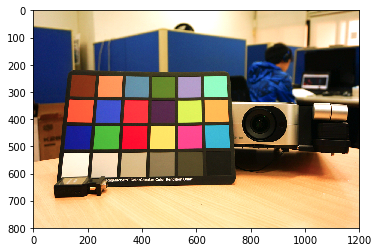

In [84]:
output = im_gamma_srgb*255
output[output>255] = 255
output[output<0] = 0
plt.imshow(output.astype(np.uint8))
plt.show()

In [85]:
P_inv

array([[ 3.24062548, -1.53720797, -0.4986286 ],
       [-0.96893071,  1.87575606,  0.04151752],
       [ 0.05571012, -0.20402105,  1.05699594]])